Analysis for Traffic Accident Prediction Dataset
1. Problem Type: Classification
This is clearly a Binary Classification problem because:

Target variable 'Accident' has binary values (0.0 and 1.0)
Goal is to predict whether an accident will occur (1) or not (0)



In [24]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [25]:
df=pd.read_csv("dataset_traffic_accident_prediction1.csv")
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


Data Cleaning

## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [26]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [27]:
df["Weather"].value_counts()
# df["Road_Type"].value_counts()

Weather
Clear     334
Rainy     230
Foggy     107
Snowy      87
Stormy     40
Name: count, dtype: int64

In [28]:
# Categorical columns - fill with mode
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Vehicle_Type', 'Road_Condition', 'Road_Light_Condition', 'Accident_Severity']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

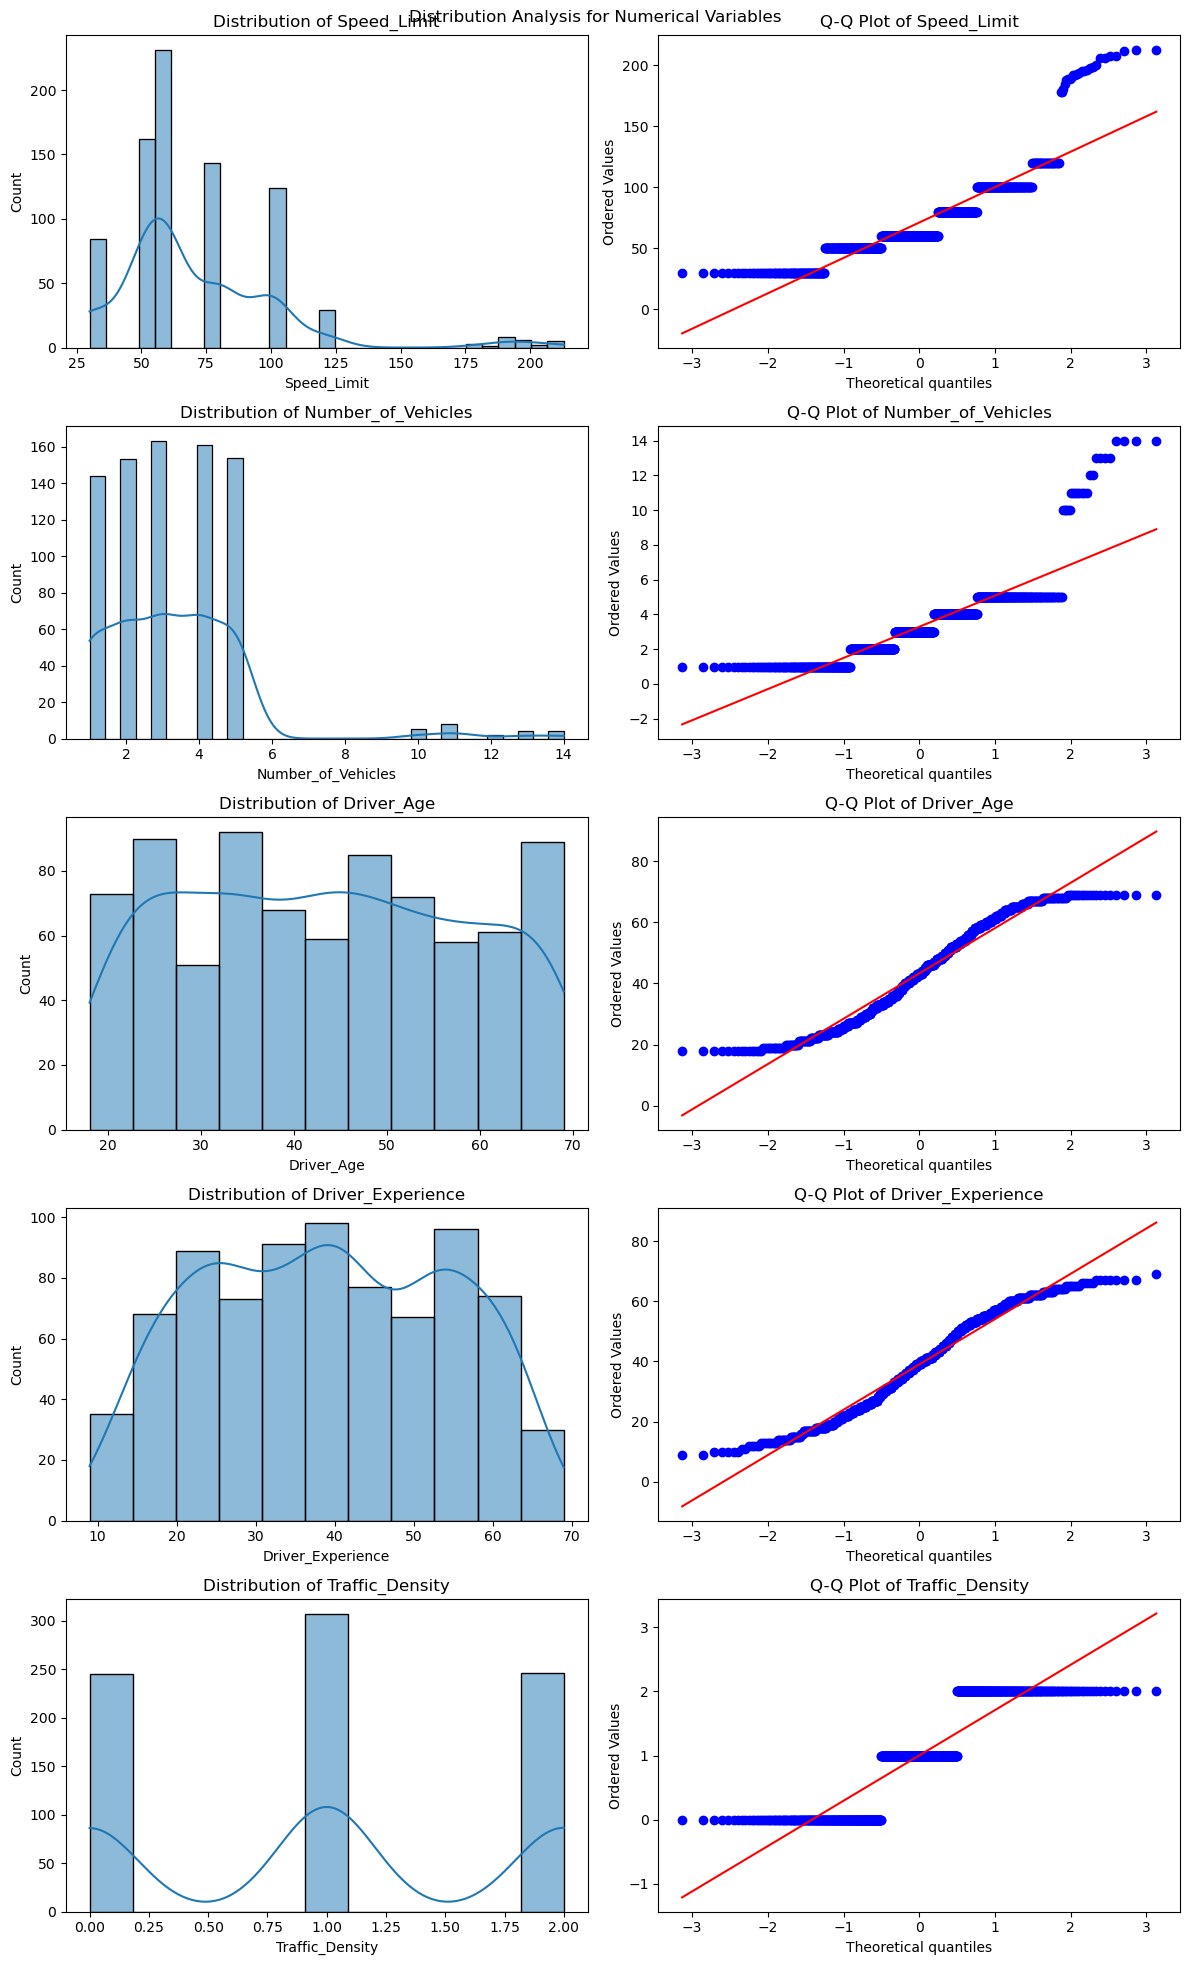

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience', 'Traffic_Density']

# Create subplots for distribution analysis
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 4*len(numerical_cols)))
fig.suptitle('Distribution Analysis for Numerical Variables')

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    
    # Q-Q plot
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

In [30]:
def impute_based_on_distribution(df, column):
    # Calculate skewness
    skewness = df[column].skew()
    
    # Print distribution information
    print(f"\n{column}:")
    print(f"Skewness: {skewness:.2f}")
    
    if abs(skewness) > 1:
        # Skewed distribution - use median
        print("→ Skewed distribution detected - Using MEDIAN imputation")
        return df[column].fillna(df[column].median())
    else:
        # Normal distribution - use mean
        print("→ Normal distribution detected - Using MEAN imputation")
        return df[column].fillna(df[column].mean())

# Apply imputation
for col in numerical_cols:
    df[col] = impute_based_on_distribution(df, col)


Speed_Limit:
Skewness: 1.85
→ Skewed distribution detected - Using MEDIAN imputation

Number_of_Vehicles:
Skewness: 2.13
→ Skewed distribution detected - Using MEDIAN imputation

Driver_Age:
Skewness: 0.06
→ Normal distribution detected - Using MEAN imputation

Driver_Experience:
Skewness: 0.01
→ Normal distribution detected - Using MEAN imputation

Traffic_Density:
Skewness: -0.00
→ Normal distribution detected - Using MEAN imputation


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             840 non-null    object 
 2   Time_of_Day           840 non-null    object 
 3   Traffic_Density       840 non-null    float64
 4   Speed_Limit           840 non-null    float64
 5   Number_of_Vehicles    840 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     840 non-null    object 
 8   Road_Condition        840 non-null    object 
 9   Vehicle_Type          840 non-null    object 
 10  Driver_Age            840 non-null    float64
 11  Driver_Experience     840 non-null    float64
 12  Road_Light_Condition  840 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [32]:
df.describe()


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,840.000000,840.000000,840.000000,798.000000,840.000000,840.000000,798.000000
mean,1.001253,70.497619,3.272619,0.160401,43.259398,38.981203,0.299499
std,0.764996,31.332695,1.967123,0.367208,14.746297,14.886008,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,31.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.259398,38.981203,0.000000
75%,2.000000,80.000000,4.000000,0.000000,55.000000,52.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [33]:
df.isnull().sum()

Weather                  0
Road_Type                0
Time_of_Day              0
Traffic_Density          0
Speed_Limit              0
Number_of_Vehicles       0
Driver_Alcohol          42
Accident_Severity        0
Road_Condition           0
Vehicle_Type             0
Driver_Age               0
Driver_Experience        0
Road_Light_Condition     0
Accident                42
dtype: int64

In [34]:
# 1. Handle Driver_Alcohol (Binary Column)
# Since it's a binary column (0/1), we'll fill with the most frequent value
df['Driver_Alcohol'] = df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mode()[0])

# 2. Handle Accident (Target Variable)
# For the target variable, it's generally better to drop rows with missing values
df = df.dropna(subset=['Accident'])

# Verify the changes
print("Missing values after treatment:")
print(df.isnull().sum())

# Save the final cleaned dataset
df.to_csv('final_cleaned_traffic_data.csv', index=False)

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

Missing values after treatment:
Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Sev

Feature Engineering

In [35]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.000000,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.001253,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.000000,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.000000,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.000000,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
